In [22]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [23]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [24]:
X_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["y"]
y_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["dist"]

X_2mm = np.load(os.path.join(data_folder, "Xy_2mm.npz"))["y"]
y_2mm = np.load(os.path.join(data_folder, "Xy_2mm.npz"))["dist"]

X_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["y"]
y_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["dist"]

X_4mm = np.load(os.path.join(data_folder, "Xy_4mm.npz"))["y"]
y_4mm = np.load(os.path.join(data_folder, "Xy_4mm.npz"))["dist"]



In [25]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [26]:
X_1mm_cut = cut_X(X_1mm)
X_2mm_cut = cut_X(X_2mm)
X_3mm_cut = cut_X(X_3mm)
X_4mm_cut = cut_X(X_4mm)

X_1mm_RF  = reshape_RF(X_1mm_cut)
X_2mm_RF  = reshape_RF(X_2mm_cut)
X_3mm_RF  = reshape_RF(X_3mm_cut)
X_4mm_RF  = reshape_RF(X_4mm_cut)


In [7]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, verbose=10 )

In [27]:
rf = RandomForestRegressor(n_estimators= 300, random_state=42)

In [39]:
X = np.vstack((X_1mm_RF, X_2mm_RF, X_4mm_RF))

In [40]:
y = np.hstack((y_1mm, y_2mm, y_4mm))

In [30]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
preds = rf.predict(X_3mm_RF)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_3mm, preds)

0.4614386296296296

In [35]:
np.round(preds)

array([2., 3., 4., 4., 3., 3., 4., 4., 4., 3., 3., 4., 4., 4., 3., 3., 4.,
       4., 4., 3., 4., 4., 4., 4., 2., 3., 3., 3., 4., 3., 4., 4., 3., 4.,
       3., 4., 3., 4., 4., 2., 3., 4., 3., 2., 3., 4., 4., 4., 4., 3., 3.,
       4., 4., 3., 3., 4., 3., 3., 3., 2., 4., 3., 3., 3., 3., 4., 4., 2.,
       4., 2., 4., 4., 4., 3., 3., 4., 4., 4., 4., 3., 3., 4., 4., 3., 4.,
       4., 4., 4., 3., 2., 4., 3., 4., 2., 3., 4., 4., 4., 4., 2., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 4., 4., 4., 4., 4., 3., 3., 3., 3., 4.,
       3., 4., 4., 4., 4., 3., 2., 4., 3., 3., 3., 4., 4., 3., 4., 3., 3.,
       3., 4., 4., 2., 4., 4., 4., 3., 3., 3., 3., 3., 3., 3., 4., 4., 3.,
       3., 4., 4., 4., 4., 4., 3., 3., 3., 4., 3., 3., 4., 4., 4., 4., 3.,
       4., 3., 4., 2., 4., 4., 4., 4., 3., 2., 4., 3., 4., 3., 3., 4., 4.,
       4., 4., 2., 3., 3., 3., 3., 3., 3., 3., 4., 2., 4., 4., 3., 4., 2.,
       3., 4., 4., 4., 2., 2., 4., 4., 3., 3., 3., 4., 4., 4., 2., 3., 4.,
       4., 4., 4., 4., 4.

/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


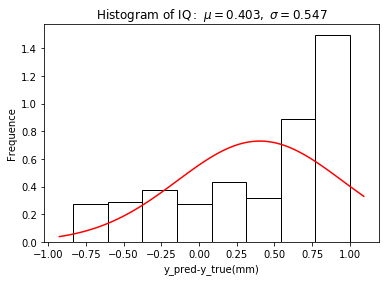

In [36]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = preds-y_3mm
mean,std=norm.fit(data)

plt.hist(data, bins=8, normed=True, facecolor='white',edgecolor ="k",  alpha=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, c='r')
plt.xlabel('y_pred-y_true(mm)')
plt.ylabel('Frequence')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()

In [37]:
rf_ma = RandomForestRegressor(n_estimators= 100, random_state=42, criterion='mae',verbose=2)

In [41]:
rf_ma.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 73.8min finished


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=2, warm_start=False)